# Fortnite Player stats

## From kill ratio, predict Win Ratio
#### Trying to answer the question: The more enemies you kill, more often you going to win?

In [19]:
# Import Pkgs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [ ]:
# read the csv file 
players_stats_df = pd.read_csv('datasets/Fortnite_players_stats.csv')

### Visualizations

<AxesSubplot:xlabel='Solo kd', ylabel='Solo winRatio'>

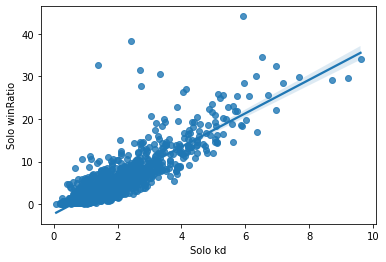

In [38]:
sns.regplot(x='Solo kd', y='Solo winRatio', data=players_stats_df)
# Shows that the bigger kills/death ratio players has, more win ratio they will have

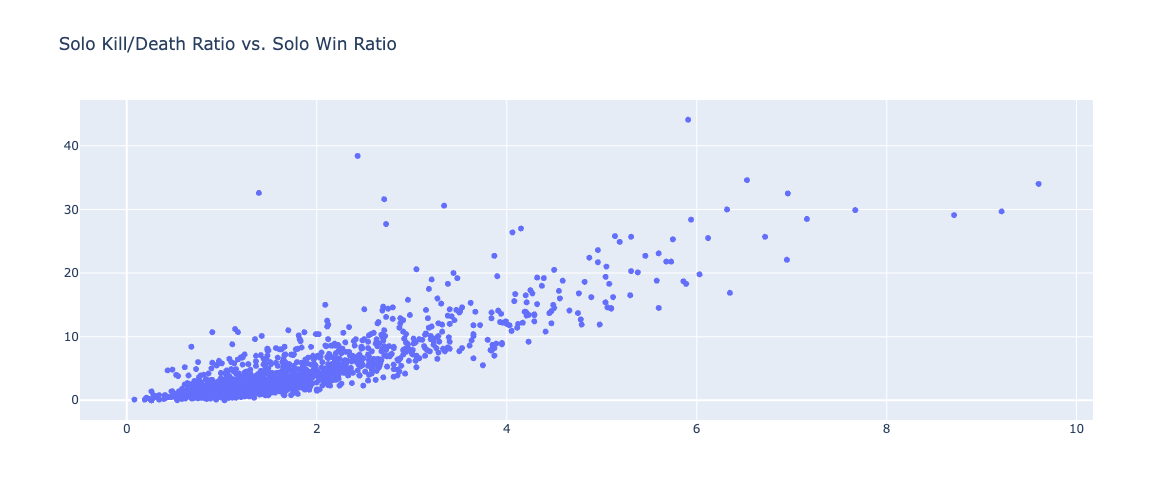

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()
fig.add_trace(go.Scatter(x=players_stats_df['Solo kd'],y=players_stats_df['Solo winRatio'], mode='markers', showlegend=False))
fig.update_layout(title='Solo Kill/Death Ratio vs. Solo Win Ratio', height=500)
fig.show()

### Training and Testing Data

In [56]:
## based on number of Solo kills predict Solo kills
# The more you kill enemies, more often you gonna win?
X = np.array(soloKillsX) 
y = np.array(soloWinRatioY)
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=72)
# We can see that data have been shuffled by "train_test_split
X_train

array([[1.07],
       [2.37],
       [1.19],
       ...,
       [1.24],
       [1.19],
       [1.14]])

In [65]:
# initialize and fit to your train data and predict on test data
regr.fit(X_train, y_train)
preds = regr.predict(X_test)
print(regr.coef_)

[3.89502216]


In [66]:
# evaluate
mean_absolute_error(y_test, preds) == np.mean(np.abs(y_test - preds))

# get the variance of (absolute) residuals
np.var(np.abs(y_test - preds))
resultQ2a = np.var((y_test - preds))
print('mean_absolute_error:', resultQ2a)

resultQ2s = mean_squared_error(soloKillsX, soloWinRatioY, squared=False)

print('mean_squared_error:', resultQ2s)

mean_absolute_error: 6.3448734515196525
mean_squared_error: 5.332080615799033


Text(0.5, 1.0, 'Solo Kills Ratio vs. Solo Win Ratio')

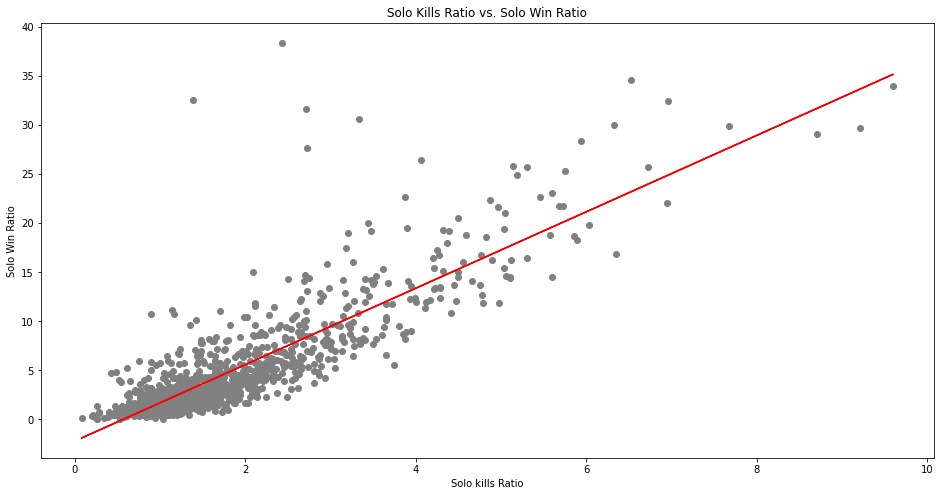

In [67]:
# Plotting the TRAIN DATA
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regr.predict(X_train), color = 'red')
plt.ylabel('Solo Win Ratio')
plt.xlabel('Solo kills Ratio')
plt.title('Solo Kills Ratio vs. Solo Win Ratio')

## Making Predictions and Saving Model

In [59]:
# first matches you are mostly playing aganst easy bots so easy to kill, the more you play, more you face high level players
new_value = [[5.0]]
new_prediction = regr.predict(new_value)
new_prediction

array([17.26542205])

In [60]:
import joblib

model_file = open("givenKillRatioPredictWinRatio.pkl","wb")
joblib.dump(regr,model_file)
model_file.close()